In [ ]:
# install main library YFinance
!pip install yfinance

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


# 1) Understanding Data-Driven Decisions data pulls

In [ ]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=24
Period for indexes: 1954-04-24 to 2024-04-24 


## 1.1) GDP

In [ ]:
# Question 1
# https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [ ]:
# Question 2
# https://fred.stlouisfed.org/series/DGS10
# https://fred.stlouisfed.org/series/DGS2
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs2 = pdr.DataReader("DGS2", "fred", start=start)

In [ ]:
df_diff = dgs10 - dgs2

In [ ]:
df = pd.merge(dgs2, dgs10, on='DATE')

In [ ]:
df['diff'] = df['DGS10'] - df['DGS2']

In [ ]:
df_2000 = df[df.index >= '2000-01-01']

In [ ]:
min_diff = df_2000['diff'].min()

In [ ]:
print(min_diff)

-1.0800000000000005


In [ ]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot.tail()

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2023-04-01,22246.23,0.021312,0.021312
2023-07-01,22369.71,0.021719,0.021719
2023-10-01,22495.19,0.022190,0.022190
2024-01-01,22618.15,0.022251,0.022251
2024-04-01,22739.00,0.022151,0.022151


## 1.2) Inflation - CPI Core

In [ ]:
# Question 3
gspc_index = yf.download('^GSPC', start='2019-04-09', end='2024-04-09')
gspc_index.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000
2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000
2019-04-15,2908.320068,2909.600098,2896.479980,2905.580078,2905.580078,3114530000


In [ ]:
gspc_index_growth = (gspc_index['Close'].iloc[-1] / gspc_index['Close'].iloc[0]) * 100

In [ ]:
print(gspc_index_growth)

180.75151917783086


In [ ]:
mxx_index = yf.download('^MXX', start='2019-04-09', end='2024-04-09')
mxx_index.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,45346.828125,45346.828125,44854.531250,45151.628906,45151.628906,191575000
2019-04-10,45204.750000,45219.410156,44850.109375,44909.140625,44909.140625,145314900
2019-04-11,44872.531250,44966.500000,44373.488281,44580.058594,44580.058594,109090000
2019-04-12,44767.671875,44888.699219,44534.378906,44686.058594,44686.058594,143662400
2019-04-15,44649.738281,44900.929688,44347.531250,44625.781250,44625.781250,108627100


In [ ]:
mxx_index_growth = (mxx_index['Close'].iloc[-1] / mxx_index['Close'].iloc[0]) * 100

In [ ]:
print(mxx_index_growth)

128.43377484045294


# 2) Data Sources for Stocks

## 2.1 OHLCV data daily - INDEXES

In [ ]:
# Question 4 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.
aapl_52_week = yf.download('AAPL',start = '2023-01-01', end = '2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
goog_52_wk = yf.download(tickers = "GOOG",
                     period = "max",
                     interval = "1wk",
                         start = '2023-01-01', end = '2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
goog_52_wk

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,89.830002,91.550003,85.570000,88.160004,88.160004,97533700
2023-01-08,89.195000,92.980003,86.699997,92.800003,92.800003,113236000
2023-01-15,92.779999,99.419998,90.839996,99.279999,99.279999,124989900
2023-01-22,99.129997,101.580002,95.262001,100.709999,100.709999,143746600
2023-01-29,98.745003,108.820000,97.519997,105.220001,105.220001,156510500
2023-02-05,102.684998,108.669998,93.860001,94.860001,94.860001,279981700
2023-02-12,95.010002,97.879997,92.650002,94.589996,94.589996,189331400
2023-02-19,93.239998,93.415001,88.860001,89.349998,89.349998,121977600
2023-02-26,90.089996,94.110001,89.519997,94.019997,94.019997,133166200


In [ ]:
goog_52_wk_2023 = goog_52_wk.loc['2023']

In [ ]:
ratio = (goog_52_wk_2023['Adj Close'].max() - goog_52_wk_2023['Adj Close'].min()) / goog_52_wk_2023['Adj Close'].max()

In [ ]:
ratio

0.382286975139678

In [ ]:
appl_52_wk['adj_close_last_year'] = appl_52_wk['Adj Close'].shift(52)
appl_52_wk['yoy_growth'] = appl_52_wk['Adj Close'] / appl_52_wk['adj_close_last_year'] -1

In [ ]:
appl_52_wk

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2023-01-01,130.279999,130.899994,124.169998,129.619995,128.735229,369948500,NaN,NaN
2023-01-08,130.470001,134.919998,128.119995,134.759995,133.840149,333335200,NaN,NaN
2023-01-15,134.830002,138.610001,133.770004,137.869995,136.928940,271823400,NaN,NaN
2023-01-22,138.119995,147.229996,137.899994,145.929993,144.933914,338655600,NaN,NaN
2023-01-29,144.960007,157.380005,141.320007,154.500000,153.445419,480249700,NaN,NaN
2023-02-05,152.570007,155.229996,149.220001,151.009995,149.979233,330758800,NaN,NaN
2023-02-12,150.949997,156.330002,150.850006,152.550003,151.740067,316792400,NaN,NaN
2023-02-19,150.199997,151.300003,145.720001,146.710007,145.931061,213742300,NaN,NaN
2023-02-26,147.710007,151.110001,143.899994,151.029999,150.228119,273994900,NaN,NaN


In [ ]:
jpm = yf.download(tickers)

In [ ]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,NaN,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,NaN,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,NaN,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-18,17775.410156,17863.320312,17716.919922,17837.400391,17837.400391,60700500,15863.950195,0.124398
2024-04-19,17834.830078,17834.869141,17626.900391,17737.359375,17737.359375,79447700,15872.129883,0.117516
2024-04-22,17738.039062,17889.470703,17738.039062,17860.800781,17860.800781,62454400,15795.730469,0.130736


<Axes: xlabel='Date'>

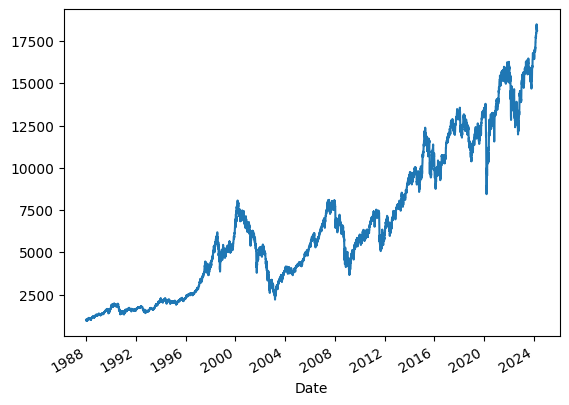

In [ ]:
dax_daily['Adj Close'].plot.line()

In [ ]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
snp500_daily = yf.download(tickers = "^SPX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
snp500_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000
2024-04-09,5217.029785,5224.810059,5160.779785,5209.910156,5209.910156,3400680000
2024-04-10,5167.879883,5178.430176,5138.700195,5160.640137,5160.640137,2287781675


In [ ]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000
2024-04-09,5217.029785,5224.810059,5160.779785,5209.910156,5209.910156,3400680000
2024-04-10,5167.879883,5178.430176,5138.700195,5160.640137,5160.640137,2288234000


In [ ]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


## 2.2 OHLCV data daily - ETFs

In [ ]:
# https://finance.yahoo.com/quote/VOO?.tsrc=fin-srch
voo_etf = yf.download(tickers = "VOO",
                     period = "max",
                     interval = "1d")


[*********************100%%**********************]  1 of 1 completed


In [ ]:
voo_etf.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-04,481.200012,481.480011,471.269989,471.480011,471.480011,6871200
2024-04-05,472.850006,478.329987,472.420013,476.489990,476.489990,5582200
2024-04-08,477.149994,478.070007,475.970001,476.679993,476.679993,4736800
2024-04-09,478.380005,478.600006,472.739990,477.269989,477.269989,5254200
2024-04-10,471.910004,474.390015,470.670013,472.649994,472.649994,6867473


In [ ]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
epi_etf_daily.head()
print(epi_etf_daily.shape)

(4059, 6)


In [ ]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily[(epi_etf_daily.index >='2023-06-23') & (epi_etf_daily.index <='2023-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,34.029999,34.150002,33.930000,34.020000,33.960003,344100
2023-06-26,34.110001,34.160000,34.049999,34.080002,34.080002,634600
2023-06-27,34.279999,34.310001,34.230000,34.310001,34.310001,417100
2023-06-28,34.410000,34.529999,34.389999,34.529999,34.529999,454400


In [ ]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2022-06-23') & (epi_etf_daily.index <='2022-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,31.129999,31.26,31.000000,31.200001,29.303230,607700
2022-06-24,29.549999,29.91,29.500000,29.900000,29.847267,387900
2022-06-27,29.799999,29.82,29.660000,29.709999,29.657600,225400
2022-06-28,29.709999,29.76,29.389999,29.420000,29.368114,466600


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

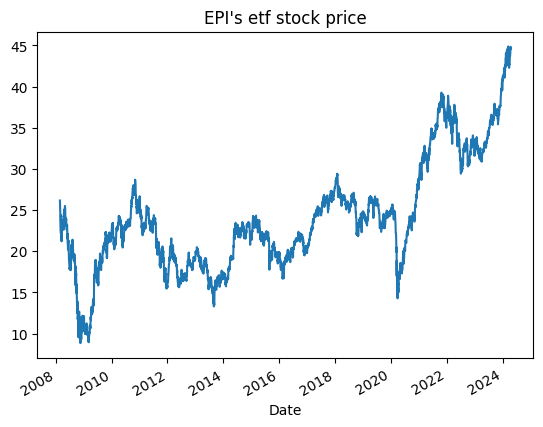

In [ ]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [ ]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [ ]:
# get dividends as Series
epi.get_dividends()

Date
2008-12-22 00:00:00-05:00    0.091
2009-03-23 00:00:00-04:00    0.007
2009-06-22 00:00:00-04:00    0.002
2009-09-21 00:00:00-04:00    0.045
2009-12-21 00:00:00-05:00    0.006
2010-06-28 00:00:00-04:00    0.065
2010-09-20 00:00:00-04:00    0.065
2010-12-22 00:00:00-05:00    0.013
2011-06-22 00:00:00-04:00    0.062
2011-09-26 00:00:00-04:00    0.098
2012-03-26 00:00:00-04:00    0.010
2012-06-25 00:00:00-04:00    0.045
2012-09-24 00:00:00-04:00    0.083
2012-12-24 00:00:00-05:00    0.024
2013-06-24 00:00:00-04:00    0.068
2013-09-23 00:00:00-04:00    0.063
2014-03-24 00:00:00-04:00    0.099
2014-06-23 00:00:00-04:00    0.059
2014-09-22 00:00:00-04:00    0.068
2015-03-23 00:00:00-04:00    0.031
2015-06-22 00:00:00-04:00    0.067
2015-09-21 00:00:00-04:00    0.116
2015-12-21 00:00:00-05:00    0.024
2016-03-21 00:00:00-04:00    0.010
2016-06-20 00:00:00-04:00    0.125
2016-09-26 00:00:00-04:00    0.070
2016-12-23 00:00:00-05:00    0.006
2017-03-27 00:00:00-04:00    0.075
2017-06-26 00:0

## 2.3 Paid data - Poligon.io (news endpoint)

In [ ]:
# Please read the article (section "Polygon.io News API"): https://pythoninvest.com/long-read/chatgpt-api-for-financial-news-summarization

In [ ]:
# Endpoint: https://polygon.io/docs/stocks/get_v2_reference_news

## 2.4 Macroeconomics

* add some indicator examples

In [ ]:
# Gold reserves excl. gold for China
# https://fred.stlouisfed.org/series/TRESEGCNM052N

In [ ]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

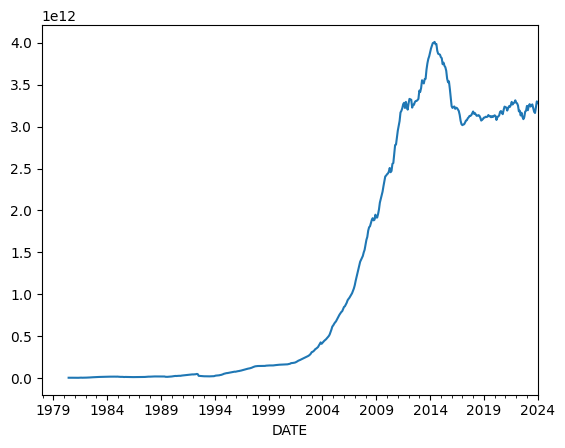

In [ ]:
gold_reserves.TRESEGCNM052N.plot.line()

In [ ]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)

<Axes: xlabel='DATE'>

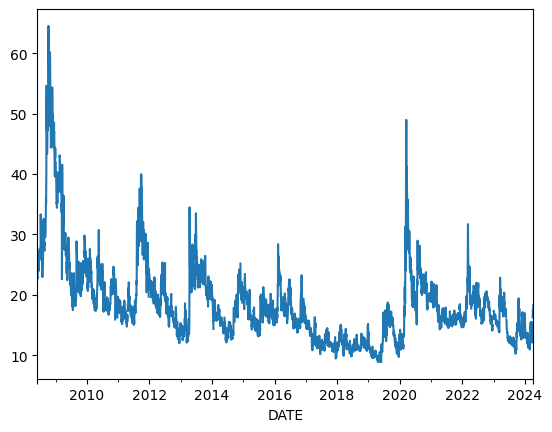

In [ ]:
gold_volatility.GVZCLS.plot.line()

In [ ]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

<Axes: xlabel='DATE'>

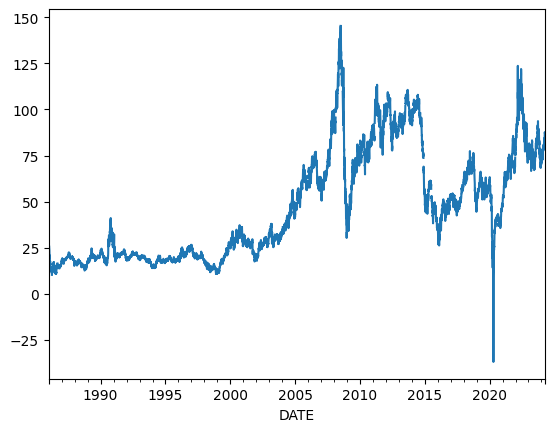

In [ ]:
# there is a bug in the data? negative price?
oil_wti.DCOILWTICO.plot.line()

In [ ]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)

<Axes: xlabel='DATE'>

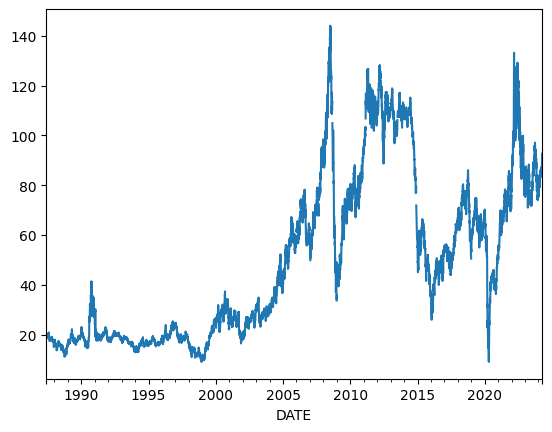

In [ ]:
oil_brent.DCOILBRENTEU.plot.line()

In [ ]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [ ]:

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0    Last  Previous  Highest    Lowest  \
0               Stock Market  5156.0    5210.0  5268.00      4.40   
1            GDP Growth Rate     3.4       4.9    34.80    -28.00   
2     GDP Annual Growth Rate     3.1       2.9    13.40     -7.50   
3          Unemployment Rate     3.8       3.9    14.90      2.50   
4          Non Farm Payrolls   303.0     270.0  4615.00 -20477.00   
5             Inflation Rate     3.5       3.2    23.70    -15.80   
6         Inflation Rate MoM     0.4       0.4     2.00     -1.80   
7              Interest Rate     5.5       5.5    20.00      0.25   
8           Balance of Trade   -68.9     -67.6     1.95   -103.00   
9            Current Account  -195.0    -196.0     9.96   -284.00   
10    Current Account to GDP    -3.0      -3.8     0.20     -6.00   
11    Government Debt to GDP   129.0     127.0   129.00     31.80   
12         Government Budget    -5.8     -12.4     4.50    -15.00   
13       Business Confidence    50

In [ ]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Stock Market,5156.0,5210.0,5268.00,4.40,points,Apr/24
1,GDP Growth Rate,3.4,4.9,34.80,-28.00,percent,Dec/23
2,GDP Annual Growth Rate,3.1,2.9,13.40,-7.50,percent,Dec/23
3,Unemployment Rate,3.8,3.9,14.90,2.50,percent,Mar/24
4,Non Farm Payrolls,303.0,270.0,4615.00,-20477.00,Thousand,Mar/24
5,Inflation Rate,3.5,3.2,23.70,-15.80,percent,Mar/24
6,Inflation Rate MoM,0.4,0.4,2.00,-1.80,percent,Mar/24
7,Interest Rate,5.5,5.5,20.00,0.25,percent,Mar/24
8,Balance of Trade,-68.9,-67.6,1.95,-103.00,USD Billion,Feb/24
9,Current Account,-195.0,-196.0,9.96,-284.00,USD Billion,Dec/23


## 2.5) Financial reporting - EDGAR (in Yahoo)

In [ ]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [ ]:
# yearly financials for the last 4 years
nvda.financials


,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Tax Effect Of Unusual Items,0.0,-284130000.0,0.0,0.0
Tax Rate For Calcs,0.12,0.21,0.019,0.017
Normalized EBITDA,35583000000.0,7340000000.0,11351000000.0,5691000000.0
Total Unusual Items,0.0,-1353000000.0,0.0,0.0
Total Unusual Items Excluding Goodwill,0.0,-1353000000.0,0.0,0.0
Net Income From Continuing Operation Net Minority Interest,29760000000.0,4368000000.0,9752000000.0,4332000000.0
Reconciled Depreciation,1508000000.0,1544000000.0,1174000000.0,1098000000.0
Reconciled Cost Of Revenue,16621000000.0,11618000000.0,9439000000.0,6279000000.0
EBITDA,35583000000.0,5987000000.0,11351000000.0,5691000000.0
EBIT,34075000000.0,4443000000.0,10177000000.0,4593000000.0


In [ ]:
# balance sheet
nvda.balance_sheet

,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,1380000000.0
Ordinary Shares Number,2464000000.0,2466136572.0,2506000000.0,2480000000.0
Share Issued,2464000000.0,2466136572.0,2506000000.0,3860000000.0
Net Debt,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,11056000000.0,12031000000.0,11831000000.0,7597000000.0
...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,25984000000.0,13296000000.0,21208000000.0,11561000000.0
Other Short Term Investments,18704000000.0,9907000000.0,19218000000.0,10714000000.0


In [ ]:
# Basic info:
nvda.basic_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [ ]:
# marketCap is quite useful, but don't know when it was updated? Daily?
nvda.basic_info['marketCap']/1e9

2175.9750366210938

In [ ]:
# read this article for full info: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

## 2.6 Web Scraping - company info for clustering

In [ ]:
# ask chatGPT: emulate clicking the link and downloading the content
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [ ]:
global_stocks = pd.read_csv("/content/global_stocks.csv")

In [ ]:
global_stocks.head()

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Microsoft,MSFT,3145008152576,423.26,United States
1,2,Apple,AAPL,2590841765888,167.78,United States
2,3,NVIDIA,NVDA,2175975030784,870.39,United States
3,4,Saudi Aramco,2222.SR,1955638294289,8.08,Saudi Arabia
4,5,Alphabet (Google),GOOG,1952887209984,157.66,United States


In [ ]:
global_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         8374 non-null   int64  
 1   Name         8374 non-null   object 
 2   Symbol       8373 non-null   object 
 3   marketcap    8374 non-null   int64  
 4   price (USD)  8374 non-null   float64
 5   country      8372 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 392.7+ KB
